## Importamos librerías últiles

In [34]:
import os
import random
from shutil import copyfile
import csv
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random

# 4.  Preparación de los datos

## Cargamos las imágenes y sus etiquetas

El dataset elegido es el de imágenes de tipo de arroz: posee imágenes de granos individuales, en escala de grises, y pertenecientes a 5 categorias distintas (Arborio, Basmati, Ipsala, Jasmine y Karacadag), contando con 15000 fotos para cada categoría; en total, el dataset seleccionado cuenta con 75000 imagenes. Los datos se encuentran ordenados en carpetas, una por cada tipo de arroz.

Dado el gran tamaño del dataset original, se procedio a realizar un muestreo del mismo tomando 1000 imágenes de cada tipo de arroz, y resultando en un dataset final de 5000 imágenes para realizar este trabajo.

In [98]:
# Levanto directamente el subsampleo de Vane:
folder = r"C:\Users\tgian\dmcyt2023\datasets\Rice_Image_Dataset\ramdon_sample_rice_image"
images_path = sorted([os.path.join(folder, file)
for file in os.listdir(folder)
if file.endswith('.jpg')])
print(len(images_path))
print(images_path)

5000
['C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (10003).jpg', 'C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (10040).jpg', 'C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (10065).jpg', 'C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (10078).jpg', 'C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (10096).jpg', 'C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (10153).jpg', 'C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (1016).jpg', 'C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (10173).jpg', 'C:\\Users\\tgian\\dmcyt2023\\datasets\\Rice_Image_Dataset\\ramdon_sample_rice_image\\Arborio (10192).jpg', 'C:\\Users\\tgian\\dmcy

In [ ]:
# Levanto las labels:
labels = pd.read_csv(r"C:\Users\tgian\dmcyt2023\datasets\Rice_Image_Dataset\ramdon_sample_rice_image\ramdon_sample_rice_labels.csv")

In [ ]:
# Lista con clases:
classes = list(labels.label.value_counts().index)
classes

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

### Compruebo dimensión de las imágenes:

(250, 250, 3)


(-0.5, 249.5, 249.5, -0.5)

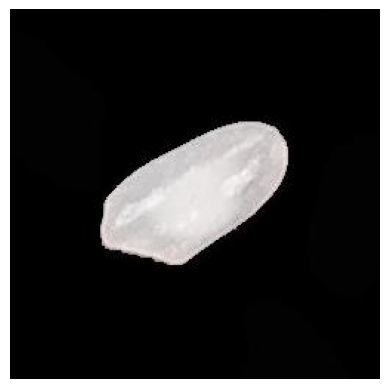

In [101]:
# Tomo una imagen random y veo su shape:
img_BGR = cv2.imread(images_path[random.randint(0, 4999)])
# cv2 trabaja con espectro de colores BGR en vez de RGB, así que tengo que convertir la imagen levantada a RGB para que se vea con los colores correctos:
# img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
print(img_BGR.shape)
plt.imshow(img_BGR)
plt.axis('off')

Todas las imágenes parecen ser de 250 x 250 x 3. Lo verifico:

In [102]:
images_odd_shape = []
for i in range(len(images_path)):
    if cv2.imread(images_path[i]).shape != (250,250,3):
        images_odd_shape.append(i)
images_odd_shape

[]

Como la lista "images_odd_shape" está vacía, comprobamos que todas las imágenes tienen la misma dimensión y los 3 canales.

### Ploteo una muestrea de 20 imágenes de cada tipo de arroz:

In [70]:
# Creo diccionario con las imágenes que pertenecen a cada tipo de arroz:
dict_rice = {}
for i in classes:
    dict_rice[f"{i}"] = labels.loc[labels.label == i]

#### Arborio

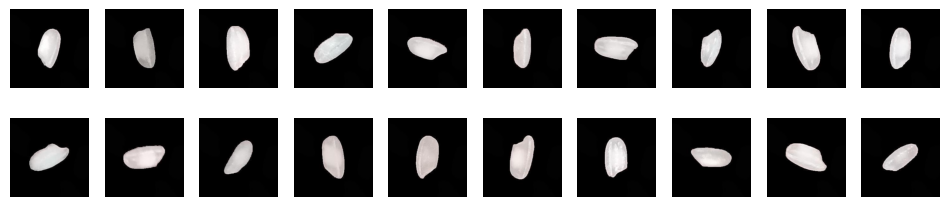

In [131]:
plt.figure(num=None, figsize=(12,4))
j=1
for i in random.sample(list(dict_rice["Arborio"].index), 20):
  plt.subplot(3,10,j)
  plt.imshow(cv2.imread(folder+"\\"+dict_rice["Arborio"]["file"][i]))
  plt.axis('off')
  j=j+1

#### Basmati

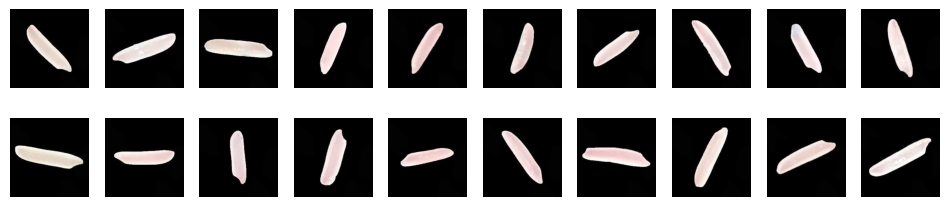

In [132]:
plt.figure(num=None, figsize=(12,4))
j=1
for i in random.sample(list(dict_rice["Basmati"].index), 20):
  plt.subplot(3,10,j)
  plt.imshow(cv2.imread(folder+"\\"+dict_rice["Basmati"]["file"][i]))
  plt.axis('off')
  j=j+1

#### Ipsala

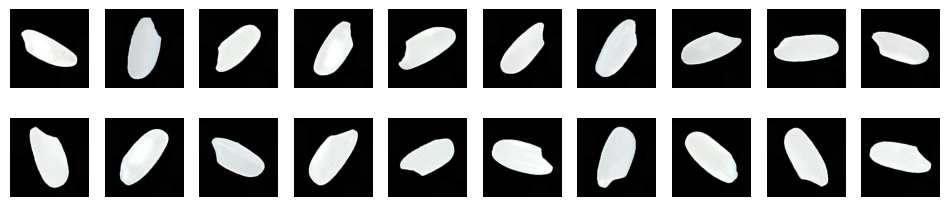

In [133]:
plt.figure(num=None, figsize=(12,4))
j=1
for i in random.sample(list(dict_rice["Ipsala"].index), 20):
  plt.subplot(3,10,j)
  plt.imshow(cv2.imread(folder+"\\"+dict_rice["Ipsala"]["file"][i]))
  plt.axis('off')
  j=j+1

#### Jasmine

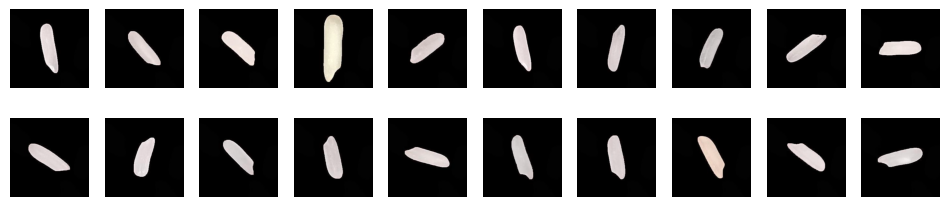

In [134]:
plt.figure(num=None, figsize=(12,4))
j=1
for i in random.sample(list(dict_rice["Jasmine"].index), 20):
  plt.subplot(3,10,j)
  plt.imshow(cv2.imread(folder+"\\"+dict_rice["Jasmine"]["file"][i]))
  plt.axis('off')
  j=j+1

#### Karacadag

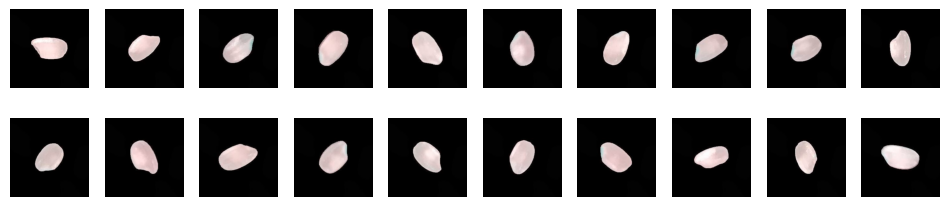

In [135]:
plt.figure(num=None, figsize=(12,4))
j=1
for i in random.sample(list(dict_rice["Karacadag"].index), 20):
  plt.subplot(3,10,j)
  plt.imshow(cv2.imread(folder+"\\"+dict_rice["Karacadag"]["file"][i]))
  plt.axis('off')
  j=j+1

# 5.  Extracción de características features